# SPAM DETECTION using NLP

In [1]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-12-04 22:33:47--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2023-12-04 22:33:48 (12.5 MB/s) - ‘spam.csv’ saved [503663/503663]



In [2]:
# import statements

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Data Preprocessing

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns = ['labels','text']
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

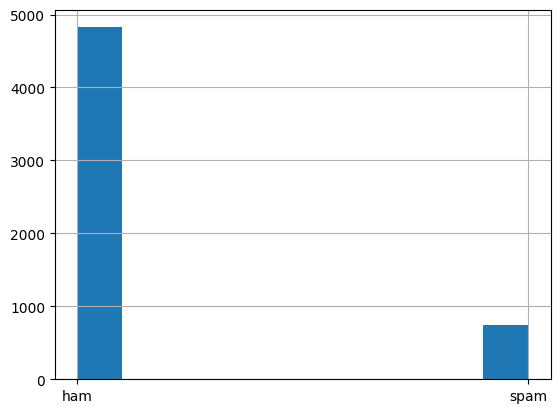

In [25]:
df['labels'].hist()

# One-Hot Encoding

In [20]:
ohe_data = pd.get_dummies(df, columns=['labels'], sparse=False, drop_first=True)

In [21]:
ohe_data.head()

,text,labels_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# Model Development

In [30]:
df_train, df_test, ytrain, ytest = train_test_split(ohe_data['text'], ohe_data['labels_spam'], test_size=0.3, random_state=42)

In [31]:
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [33]:
Xtrain

<3900x7206 sparse matrix of type '<class 'numpy.int64'>'
	with 51569 stored elements in Compressed Sparse Row format>

In [37]:
model = MultinomialNB()
history = model.fit(Xtrain, ytrain)

# Evaluation

In [40]:
print(f"Train Accuracy : {model.score(Xtrain, ytrain)}")
print(f"Test Accuracy : {model.score(Xtest, ytest)}")

Train Accuracy : 0.9948717948717949
Test Accuracy : 0.9820574162679426


In [45]:
ypred = model.predict(Xtest)

In [48]:
print(f"F-1 score: {f1_score(ytest, ypred)}")
print(f"ROC-AUC score: {roc_auc_score(ytest, ypred)}")

F-1 score: 0.9282296650717703
ROC-AUC score: 0.9412017963149774


In [49]:
cm = confusion_matrix(y_true=ytest, y_pred=ypred)

In [50]:
print(cm)

[[1448    5]
 [  25  194]]


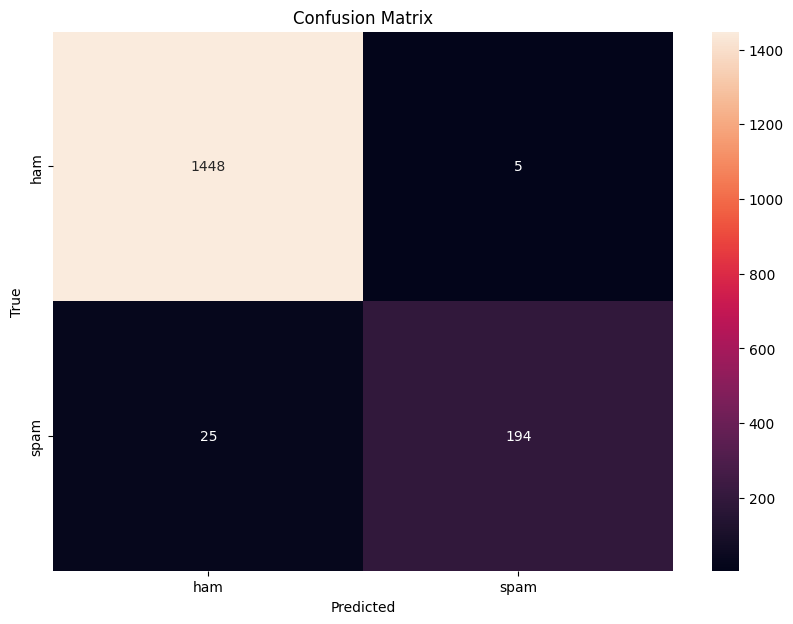

In [53]:
# Plotting
class_labels = ['ham', 'spam']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# create wordcloud to visualize data

def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

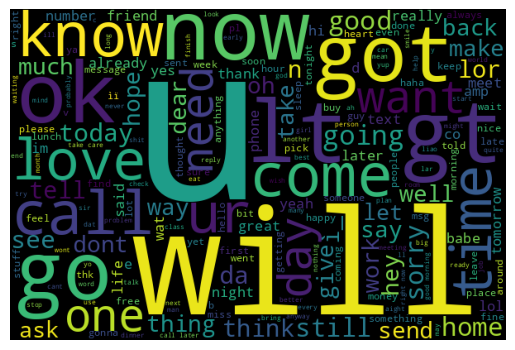

In [57]:
visualize('ham')

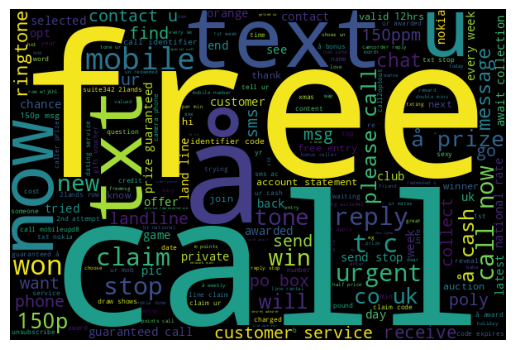

In [58]:
visualize('spam')

# Sneaky Spams

In [63]:
X = featurizer.transform(df['text'])
df['prediction'] = model.predict(X)

In [67]:
sneaky_spams = df[(df['prediction'] == 0) & (df['labels'] == 'spam')]['text']

In [68]:
for msg in sneaky_spams:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45P

In [70]:
not_actually_spam = df[(df['prediction'] == 1) & (df['labels'] == 'ham')]['text']

In [71]:
for msg in not_actually_spam:
    print(msg)

Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
U WILL SWITCH YOUR FONE ON DAMMIT!!
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
